# import librarys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Matplotlib is building the font cache; this may take a moment.


# Read File and chenage columns

In [2]:
stress = pd.read_csv("Stress.csv")
stress.info()

stress_check = stress

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 19 columns):
 #   Column                                                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                                                      --------------  ----- 
 0   1. Age                                                                                                                                      2028 non-null   object
 1   2. Gender                                                                                                                                   2028 non-null   object
 2   3. University                                                                                                                               2028 non-null   object
 3   4. Department                                   

In [3]:
stress.columns

Index(['1. Age', '2. Gender', '3. University', '4. Department',
       '5. Academic Year', '6. Current CGPA',
       '7. Did you receive a waiver or scholarship at your university?',
       '1. In a semester, how often have you felt upset due to something that happened in your academic affairs? ',
       '2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?',
       '3. In a semester, how often you felt nervous and stressed because of academic pressure? ',
       '4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams) ',
       '5. In a semester, how often you felt confident about your ability to handle your academic / university problems?',
       '6. In a semester, how often you felt as if things in your academic life is going on your way? ',
       '7. In a semester, how often are you able to control irritations in your academic / university 

In [4]:
# change columns
stress.columns = ["Age", "Gender", "University", "Department", "Academic_Year", "CGPA", "Scholarship", "Upset", "control_important_affairs", "Nervous", 
                  "disability", "ability", "Academic_situation", "control_upset_affairs", "Top_performance", "angered_performance","Not_overcome", 
                  "Stress_Value", "Stress_Label"]

stress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        2028 non-null   object
 1   Gender                     2028 non-null   object
 2   University                 2028 non-null   object
 3   Department                 2028 non-null   object
 4   Academic_Year              2028 non-null   object
 5   CGPA                       2028 non-null   object
 6   Scholarship                2028 non-null   object
 7   Upset                      2028 non-null   int64 
 8   control_important_affairs  2028 non-null   int64 
 9   Nervous                    2028 non-null   int64 
 10  disability                 2028 non-null   int64 
 11  ability                    2028 non-null   int64 
 12  Academic_situation         2028 non-null   int64 
 13  control_upset_affairs      2028 non-null   int64 
 14  Top_perf

# Overview

In [5]:
# create variable for Overview and train, test operation
train, test = train_test_split(stress, test_size=0.2, random_state=2)
stress_view = stress.copy()
train.shape, test.shape

((1622, 19), (406, 19))

In [6]:
stress_view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        2028 non-null   object
 1   Gender                     2028 non-null   object
 2   University                 2028 non-null   object
 3   Department                 2028 non-null   object
 4   Academic_Year              2028 non-null   object
 5   CGPA                       2028 non-null   object
 6   Scholarship                2028 non-null   object
 7   Upset                      2028 non-null   int64 
 8   control_important_affairs  2028 non-null   int64 
 9   Nervous                    2028 non-null   int64 
 10  disability                 2028 non-null   int64 
 11  ability                    2028 non-null   int64 
 12  Academic_situation         2028 non-null   int64 
 13  control_upset_affairs      2028 non-null   int64 
 14  Top_perf

In [7]:
stress_view.head()

,Age,Gender,University,Department,Academic_Year,CGPA,Scholarship,Upset,control_important_affairs,Nervous,disability,ability,Academic_situation,control_upset_affairs,Top_performance,angered_performance,Not_overcome,Stress_Value,Stress_Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,3,4,3,2,2,1,2,2,4,4,29,High Perceived Stress
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,3,3,4,2,3,2,2,2,2,3,24,Moderate Stress
2,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,0,0,0,0,0,1,0,0,0,0,15,Moderate Stress
3,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,3,1,2,1,4,3,2,2,3,2,17,Moderate Stress
4,18-22,Male,North South University (NSU),Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,4,4,4,2,2,2,0,2,4,4,32,High Perceived Stress


In [8]:
stress_view.describe()

,Upset,control_important_affairs,Nervous,disability,ability,Academic_situation,control_upset_affairs,Top_performance,angered_performance,Not_overcome,Stress_Value
count,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000
mean,2.350099,2.326923,2.708087,2.369329,2.173077,1.790927,1.932446,1.721893,2.426036,2.435897,22.998028
std,1.178962,1.156746,1.132379,1.222703,1.084549,1.098807,1.019723,1.132371,1.177386,1.166602,6.755071
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,19.000000
50%,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,22.000000
75%,3.000000,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,27.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,40.000000


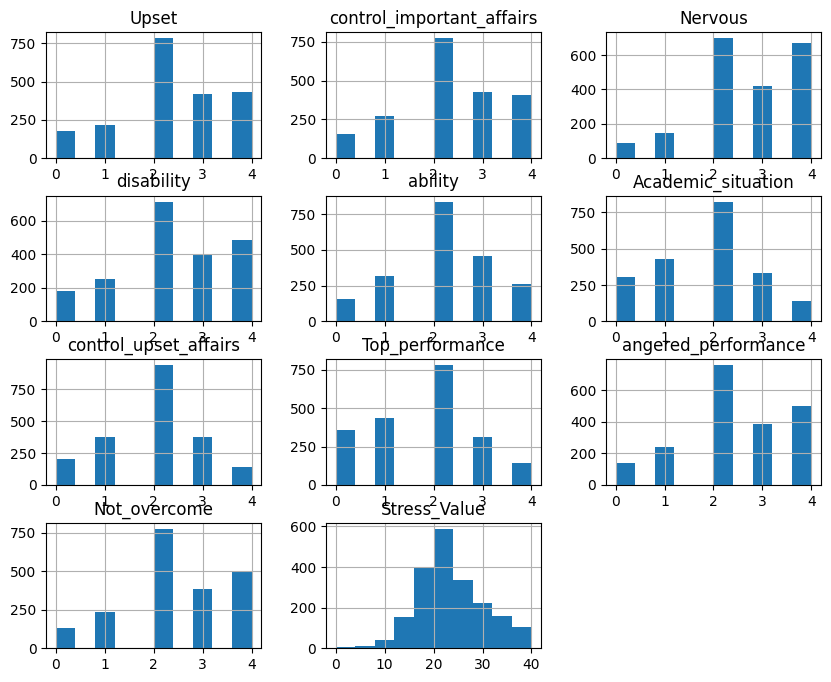

In [9]:
stress_view.hist(figsize=(10,8))
plt.show()

In [10]:
stress_view["Age"].unique()

array(['18-22', '23-26', '27-30', 'Above 30', 'Below 18'], dtype=object)

In [11]:
stress_view["Academic_Year"].value_counts()

Academic_Year
First Year or Equivalent     601
Third Year or Equivalent     570
Fourth Year or Equivalent    403
Second Year or Equivalent    382
Other                         72
Name: count, dtype: int64

In [12]:
stress_view["CGPA"].value_counts()

CGPA
3.00 - 3.39    583
3.40 - 3.79    560
2.50 - 2.99    389
3.80 - 4.00    241
Other          171
Below 2.50      84
Name: count, dtype: int64

In [13]:
stress_view["Gender"].value_counts()

Gender
Male                 1405
Female                613
Prefer not to say      10
Name: count, dtype: int64

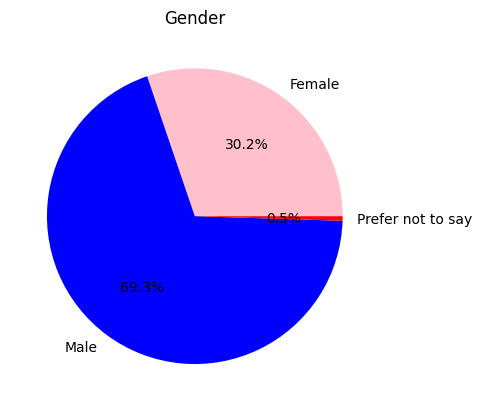

In [14]:
encoder = LabelEncoder()
gender = encoder.fit_transform(stress_view["Gender"])

count = np.bincount(gender)

plt.pie(count, labels=["Female", "Male", "Prefer not to say"], autopct='%1.1f%%', colors=["Pink", "Blue", "Red"])
plt.title("Gender")
plt.show()

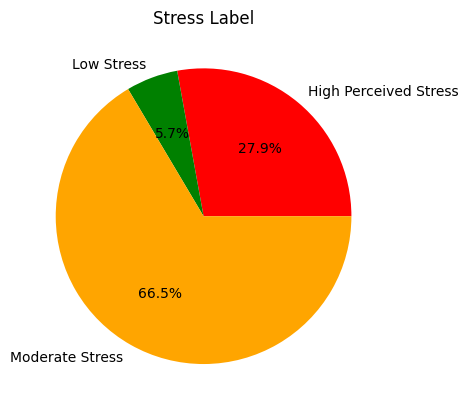

In [15]:
encoder = LabelEncoder()
label = encoder.fit_transform(stress_view["Stress_Label"])

count = np.bincount(label)

plt.pie(count, labels=["High Perceived Stress", "Low Stress", "Moderate Stress"], autopct='%1.1f%%', colors=["Red", "Green", "Orange"])
plt.title("Stress Label")
plt.show()

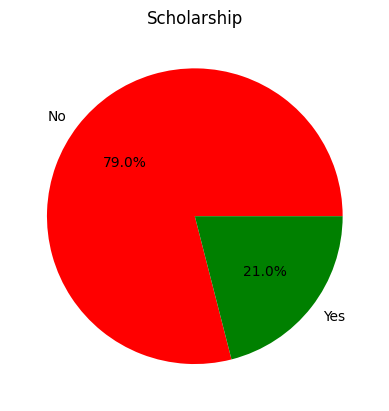

In [16]:
encoder = LabelEncoder()
scholarship = encoder.fit_transform(stress_view["Scholarship"])
scholarship = np.bincount(scholarship)

plt.pie(scholarship, labels=["No", "Yes"], autopct='%1.1f%%', colors=["Red", "Green"])
plt.title("Scholarship")
plt.show()

In [17]:
# encode object columns in general view value for correlations
encoder = OrdinalEncoder(handle_unknown='error')
stressv_encode = encoder.fit_transform(stress_view[["Age", "Gender", "Academic_Year", "CGPA", "Scholarship", "Stress_Label"]])
stressv_encode = pd.DataFrame(stressv_encode, columns=["Age", "Gender", "Academic_Year", "CGPA", "Scholarship", "Stress_Label"])

stressv_num = stress_view.drop(["University", "Department", "Age", "Gender", "Academic_Year", "CGPA", "Scholarship", "Stress_Label"], axis=1)

stressv_encode = pd.concat([stressv_num, stressv_encode], axis=1)

correlation = stressv_encode.corr()
# correlation["Stress_Value"].sort_values(ascending=False)
correlation["Stress_Label"].sort_values(ascending=False)

Stress_Label                 1.000000
Academic_situation           0.331769
Top_performance              0.303878
control_upset_affairs        0.231147
ability                      0.196197
Gender                       0.093230
Age                          0.042840
Scholarship                  0.012936
Academic_Year               -0.057281
CGPA                        -0.066642
angered_performance         -0.472680
Upset                       -0.478875
Nervous                     -0.495302
disability                  -0.509749
control_important_affairs   -0.517187
Not_overcome                -0.532423
Stress_Value                -0.693075
Name: Stress_Label, dtype: float64

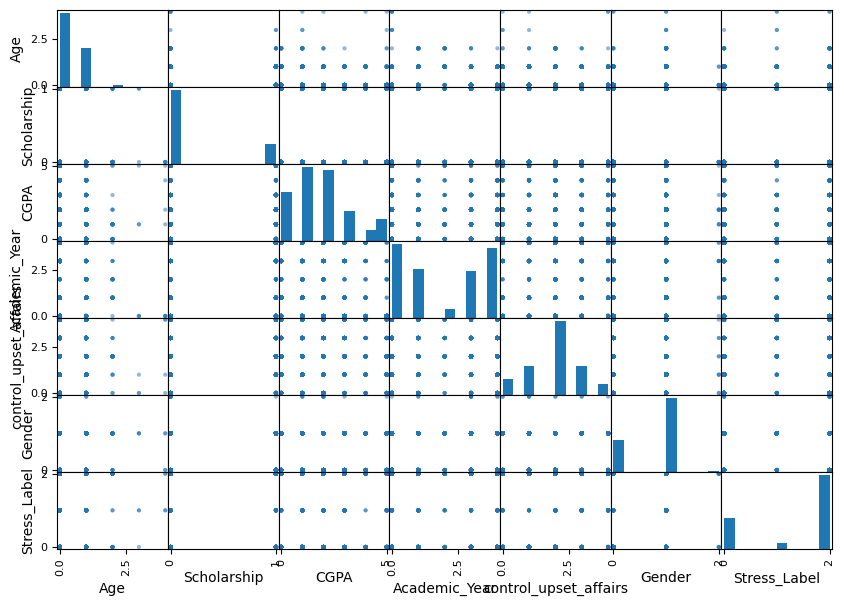

In [18]:
# check other correlations
features = ["Age", "Scholarship", "CGPA", "Academic_Year", "control_upset_affairs", "Gender", "Stress_Label"]

scatter_matrix(stressv_encode[features], figsize=(10,7))
plt.show()

In [19]:
stress_view["Stress_Label"].unique()

array(['High Perceived Stress', 'Moderate Stress', 'Low Stress'],
      dtype=object)

In [20]:
stress_view[stress_view["Stress_Label"] == "High Perceived Stress"][["Stress_Value"]].describe()

,Stress_Value
count,565.000000
mean,31.762832
std,3.688736
min,27.000000
25%,29.000000
50%,31.000000
75%,34.000000
max,40.000000


# Preprocessing Operations
- Remove University, Department columns
- Removing the stress value column due to incompleteness
- Encode object columns

In [21]:
# preprocessing without pipeline

# create data frame for process
df = train.copy()

# transform dataset label
df_y = df.copy()
y_trans = []            # label transformed

for i in df_y["Stress_Label"]:
    if i == "Low Stress":
        y_trans.append(0)

    elif i == "Moderate Stress":
        y_trans.append(1)

    elif i == "High Perceived Stress":
        y_trans.append(2)

df_y = np.array(y_trans)

# Remove unused and label columns
df = df.drop(["University", "Department", "Stress_Label", "Stress_Value"], axis=1)

# create number and object columns
df_num = df.drop(["Age", "Gender", "Nervous", "Academic_Year", "CGPA", "Scholarship"], axis=1)
ordinal_cat = ["Age", "Nervous", "Academic_Year", "CGPA", "Scholarship"]
onehot_cat = ["Gender"]

# standardization number data 
scaler = StandardScaler()
number_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

# ordinal encode category without Gender
encoder = OrdinalEncoder(handle_unknown='error')
df_encode = pd.DataFrame(encoder.fit_transform(df[ordinal_cat]), columns=ordinal_cat)
df_encode = pd.DataFrame(scaler.fit_transform(df_encode), columns=df_encode.columns)

# onehot encode Gender category
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
gender_encode = pd.DataFrame(encoder.fit_transform(df[onehot_cat]))
gender_encode = pd.DataFrame(scaler.fit_transform(gender_encode), columns=encoder.get_feature_names_out(["Gender"]))

# concatinate data frames
final_df = pd.concat([df_encode, gender_encode, number_scaled], axis=1)
final_df.head()

,Age,Nervous,Academic_Year,CGPA,Scholarship,Gender_Female,Gender_Male,Gender_Prefer not to say,Upset,control_important_affairs,disability,ability,Academic_situation,control_upset_affairs,Top_performance,angered_performance,Not_overcome
0,-0.725249,0.266280,-1.197770,2.243845,-0.519773,-0.659847,0.667557,-0.070403,1.411772,1.481283,1.351246,0.750279,-0.736974,1.046230,0.242550,-0.359041,1.362262
1,1.165995,-0.611578,1.231468,-0.552556,-0.519773,-0.659847,0.667557,-0.070403,0.556057,-0.271830,-0.292339,0.750279,1.081082,1.046230,1.118755,0.492369,-0.355258
2,-0.725249,-0.611578,-1.197770,0.845644,-0.519773,-0.659847,0.667557,-0.070403,-0.299659,-0.271830,0.529453,0.750279,0.172054,1.046230,-0.633655,-0.359041,-0.355258
3,1.165995,1.144137,-0.590461,0.146544,-0.519773,1.515503,-1.497999,-0.070403,1.411772,0.604727,1.351246,-1.103419,-0.736974,0.057311,-1.509860,1.343778,1.362262
4,1.165995,-0.611578,-0.590461,-1.251657,1.923915,-0.659847,0.667557,-0.070403,-0.299659,0.604727,-0.292339,-0.176570,0.172054,0.057311,0.242550,-0.359041,-0.355258


# Pipeline Preprocessing 

In [22]:
# select attributes for process
class AttributeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, Attributes):
        self.attr = Attributes

    def fit(self, df):
        return self
    
    def transform(self, df):
        return df[self.attr].values
    

# transform dataset label
def y_transform(df):
    trans_list = []

    for i in df["Stress_Label"]:
        if i == "Low Stress":
            trans_list.append(0)

        elif i == "Moderate Stress":
            trans_list.append(1)

        elif i == "High Perceived Stress":
            trans_list.append(2)
    
    return trans_list


df = train.copy()
df_y = y_transform(df)

num_cat = ['Upset', 'control_important_affairs', 'Nervous', 'disability', 'ability', 'Academic_situation', 'control_upset_affairs','Top_performance', 
                   'angered_performance', 'Not_overcome']

obj_cat1 = ["Age", "Academic_Year", "CGPA", "Scholarship"]                      # ordinal encode feature
obj_cat2 = ["Gender"]                                                           # onehot encode feature

# number process
number_pipeline = Pipeline([
    ("attribute_selector", AttributeSelector(Attributes=num_cat)),
    ("standard_scaler", StandardScaler())
])

# ordinal encode process
obj1_pipeline = Pipeline([
    ("attribute_selector", AttributeSelector(Attributes=obj_cat1)),
    ("ordinal_encode", OrdinalEncoder(handle_unknown='error')),
    ("standard_scaler", StandardScaler())
])

# onehot encode process
obj2_pipeline = Pipeline([
    ("attribute_selector", AttributeSelector(Attributes=obj_cat2)),
    ("ordinal_encode", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
    ("standard_scaler", StandardScaler())
])

# final process
final_pipeline = FeatureUnion(transformer_list=[
    ("number_process", number_pipeline),
    ("object_process1", obj1_pipeline),
    ("object_process2", obj2_pipeline)
])

df_prepared_tmp = final_pipeline.fit_transform(df)
df_prepared = pd.DataFrame(df_prepared_tmp)
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1622 entries, 0 to 1621
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1622 non-null   float64
 1   1       1622 non-null   float64
 2   2       1622 non-null   float64
 3   3       1622 non-null   float64
 4   4       1622 non-null   float64
 5   5       1622 non-null   float64
 6   6       1622 non-null   float64
 7   7       1622 non-null   float64
 8   8       1622 non-null   float64
 9   9       1622 non-null   float64
 10  10      1622 non-null   float64
 11  11      1622 non-null   float64
 12  12      1622 non-null   float64
 13  13      1622 non-null   float64
 14  14      1622 non-null   float64
 15  15      1622 non-null   float64
 16  16      1622 non-null   float64
dtypes: float64(17)
memory usage: 215.6 KB


# train Models

In [23]:
# best show model result
def display_show(score, model):
    print("======================", model, "======================")
    print("score: ", score)
    print("mean: ", score.mean())
    print("Standard deviation: ", score.std())

In [24]:
# Random Forest model test
forest_cls = RandomForestClassifier()

score = cross_val_score(forest_cls, df_prepared, df_y, scoring='accuracy', cv=10)

display_show(score, "Random Forest Classifier")

====================== Random Forest Classifier ======================
score:  [0.94478528 0.93251534 0.95061728 0.92592593 0.92592593 0.95679012
 0.9382716  0.95061728 0.94444444 0.9382716 ]
mean:  0.9408164811027797
Standard deviation:  0.010007503271194049


In [25]:
# KNeighbors Classifier model test
knn_cls = KNeighborsClassifier()

score = cross_val_score(knn_cls, df_prepared, df_y, scoring='accuracy', cv=10)

display_show(score, "KNeighbors Classifier")

====================== KNeighbors Classifier ======================
score:  [0.90184049 0.92638037 0.92592593 0.90123457 0.92592593 0.93209877
 0.90123457 0.91358025 0.88271605 0.92592593]
mean:  0.9136862834204347
Standard deviation:  0.01535957586432743


In [26]:
# Support Vector Classifier model test
svc = SVC()

score = cross_val_score(svc, df_prepared, df_y, scoring='accuracy', cv=10)

display_show(score, "Support Vector Classifier")

====================== Support Vector Classifier ======================
score:  [0.94478528 0.96319018 0.97530864 0.9691358  0.96296296 0.98765432
 0.9691358  0.9691358  0.98148148 0.95679012]
mean:  0.9679580398394304
Standard deviation:  0.011568933701196183


In [27]:
# Multi Layer Perceptron Classifier model test
ann_cls = MLPClassifier()

score = cross_val_score(ann_cls, df_prepared, df_y, scoring='accuracy', cv=10)

display_show(score, "Multi Layer Perceptron Classifier")

c:\Users\Ernestsalman\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ernestsalman\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ernestsalman\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ernestsalman\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

====================== Multi Layer Perceptron Classifier ======================
score:  [0.98773006 0.99386503 0.99382716 0.98148148 0.9691358  0.99382716
 0.9691358  0.97530864 0.98148148 0.98148148]
mean:  0.9827274104370218
Standard deviation:  0.009080973296094613


c:\Users\Ernestsalman\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
svc = SVC()

param_grid = [
    {'C': [1, 10, 20, 30], 'kernel': ['linear', 'rbf']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

search = GridSearchCV(svc, param_grid, scoring='accuracy', cv=10)
search.fit(df_prepared, df_y)

print("Best Estimator: ", search.best_estimator_)
print("Best parameters: ", search.best_params_)

Best Estimator:  SVC(C=10, kernel='linear')
Best parameters:  {'C': 10, 'kernel': 'linear'}


# choose support vector model because better performance in time

# test model

In [29]:
model = search.best_estimator_
df_test = test.copy()
test_y = y_transform(df_test)
df_test = df_test.drop(["University", "Department", "Stress_Value", "Stress_Label"], axis=1)
test_prepared = pd.DataFrame(final_pipeline.transform(df_test))
test_pred = model.predict(test_prepared)
print("Accuracy Score is = ", accuracy_score(test_y, test_pred))
print(f"Confusion Matrix is = \n {confusion_matrix(test_y, test_pred)}")

Accuracy Score is =  1.0
Confusion Matrix is = 
 [[ 16   0   0]
 [  0 262   0]
 [  0   0 128]]


# create class for connect to UI

In [30]:
# select attributes for process
class AttributeSelector(BaseEstimator, TransformerMixin):
    # select attributes
    def __init__(self, Attributes):
        self.attr = Attributes

    def fit(self, df):
        return self
    
    # return dataframe values
    def transform(self, df):
        return df[self.attr].values
    
# data mining process
class DataMining(BaseEstimator, TransformerMixin):
    __model = None
    __df_prepared = None

    def __preprocessing(self, base, new):
        num_cat = ['Upset', 'control_important_affairs', 'Nervous', 'disability', 'ability', 'Academic_situation', 'control_upset_affairs','Top_performance', 
                   'angered_performance', 'Not_overcome']
        
        obj_cat1 = ["Age", "Academic_Year", "CGPA", "Scholarship"]                      # ordinal encode feature
        obj_cat2 = ["Gender"]                                                           # onehot encode feature

        # number process
        number_pipeline = Pipeline([
            ("attribute_selector", AttributeSelector(Attributes=num_cat)),
            ("simple_imputer", SimpleImputer(missing_values=np.nan, strategy='median')),
            ("standard_scaler", StandardScaler())
        ])

        # ordinal encode process
        obj1_pipeline = Pipeline([
            ("attribute_selector", AttributeSelector(Attributes=obj_cat1)),
            ("ordinal_encode", OrdinalEncoder(handle_unknown='error')),
            ("standard_scaler", StandardScaler())
        ])

        # onehot encode process
        obj2_pipeline = Pipeline([
            ("attribute_selector", AttributeSelector(Attributes=obj_cat2)),
            ("ordinal_encode", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
            ("standard_scaler", StandardScaler())
        ])

        # final process
        final_pipeline = FeatureUnion(transformer_list=[
            ("number_process", number_pipeline),
            ("object_process1", obj1_pipeline),
            ("object_process2", obj2_pipeline)
        ])

        base_prepared = pd.DataFrame(final_pipeline.fit_transform(base))
        self.__df_prepared = pd.DataFrame(final_pipeline.transform(new))        # new data frame prepared

        return base_prepared

    def fit(self, df):
        # model
        svc = SVC(C=10, kernel='linear')
        # base file reading for machin learn
        base = pd.read_csv('Stress.csv')
        base.columns = ["Age", "Gender", "University", "Department", "Academic_Year", "CGPA", "Scholarship", "Upset", "control_important_affairs", "Nervous", 
                  "disability", "ability", "Academic_situation", "control_upset_affairs", "Top_performance", "angered_performance","Not_overcome", 
                  "Stress_Value", "Stress_Label"]
        
        trans_list = []
        for i in base["Stress_Label"]:
            if i == "Low Stress":
                trans_list.append(0)

            elif i == "Moderate Stress":
                trans_list.append(1)

            elif i == "High Perceived Stress":
                trans_list.append(2)

        base_y = trans_list

        base_prepared = self.__preprocessing(base=base, new=df)

        self.__model = svc.fit(base_prepared, base_y)
        
        return self
    
    def transform(self, df):
        df_prepared = self.__df_prepared.copy()

        df_predict = self.__model.predict(df_prepared)

        y_transform = []
        for i in df_predict:
            if i == 0:
                y_transform.append("Low Stress")
            elif i == 1:
                y_transform.append("Moderate Stress")
            else:
                y_transform.append("High Perceived Stress")

        y_transform = pd.DataFrame(y_transform, columns=["Stress_Label"])

        df.reset_index(inplace=True, drop=True)
        final_df = pd.concat([df, y_transform], axis=1)

        return final_df


dm = DataMining()
result = dm.fit_transform(test)

result.head()

,Age,Gender,University,Department,Academic_Year,CGPA,Scholarship,Upset,control_important_affairs,Nervous,disability,ability,Academic_situation,control_upset_affairs,Top_performance,angered_performance,Not_overcome,Stress_Value,Stress_Label,Stress_Label
0,23-26,Female,"Independent University, Bangladesh (IUB)",Environmental and Life Sciences,First Year or Equivalent,3.40 - 3.79,No,2,2,2,2,2,1,2,2,2,2,21,Moderate Stress,Moderate Stress
1,27-30,Male,Dhaka University of Engineering and Technology...,Engineering - CS / CSE / CSC / Similar to CS,Other,Other,No,3,3,3,2,3,1,2,0,1,1,23,Moderate Stress,Moderate Stress
2,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,2.50 - 2.99,No,2,2,2,2,1,1,1,1,2,2,24,Moderate Stress,Moderate Stress
3,18-22,Male,East West University (EWU),Engineering - CS / CSE / CSC / Similar to CS,Fourth Year or Equivalent,3.00 - 3.39,Yes,4,2,4,1,3,2,2,2,2,4,24,Moderate Stress,Moderate Stress
4,23-26,Female,Islamic University of Technology (IUT),Engineering - EEE/ ECE / Similar to EEE,Fourth Year or Equivalent,3.80 - 4.00,Yes,4,4,4,4,3,2,2,2,4,4,31,High Perceived Stress,High Perceived Stress


In [31]:
stress["CGPA"].unique()

array(['2.50 - 2.99', '3.00 - 3.39', '3.40 - 3.79', '3.80 - 4.00',
       'Below 2.50', 'Other'], dtype=object)